In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.shape

(200, 5)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Age', ylabel='Density'>

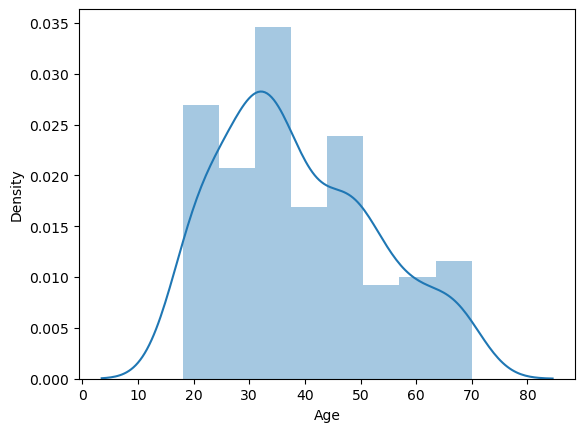

In [7]:
sns.distplot(dataset['Age'])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

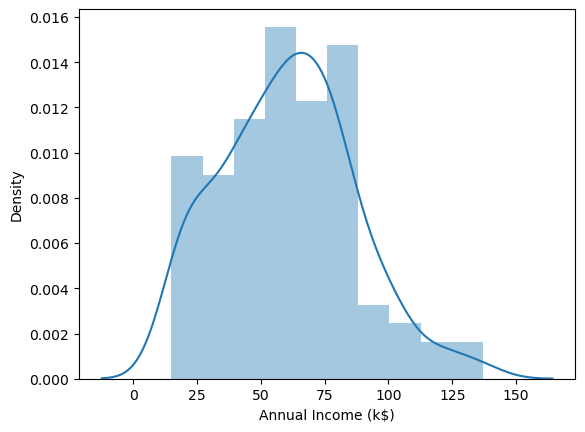

In [8]:
sns.distplot(dataset['Annual Income (k$)'])

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

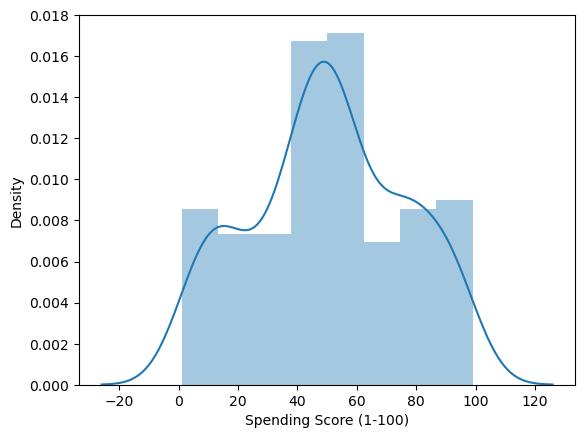

In [9]:
sns.distplot(dataset['Spending Score (1-100)'])

In [11]:
#clustering
#on two featres
dataset1=dataset[['Annual Income (k$)','Spending Score (1-100)']]
dataset1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

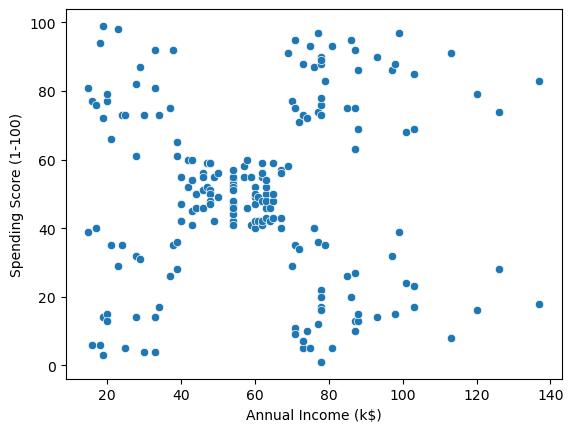

In [12]:
#scatter plot
sns.scatterplot(x=dataset1['Annual Income (k$)'],y=dataset1['Spending Score (1-100)'])

In [14]:
from sklearn.cluster import KMeans
X=dataset1[['Annual Income (k$)','Spending Score (1-100)']]
errors=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    errors.append(kmeans.inertia_)


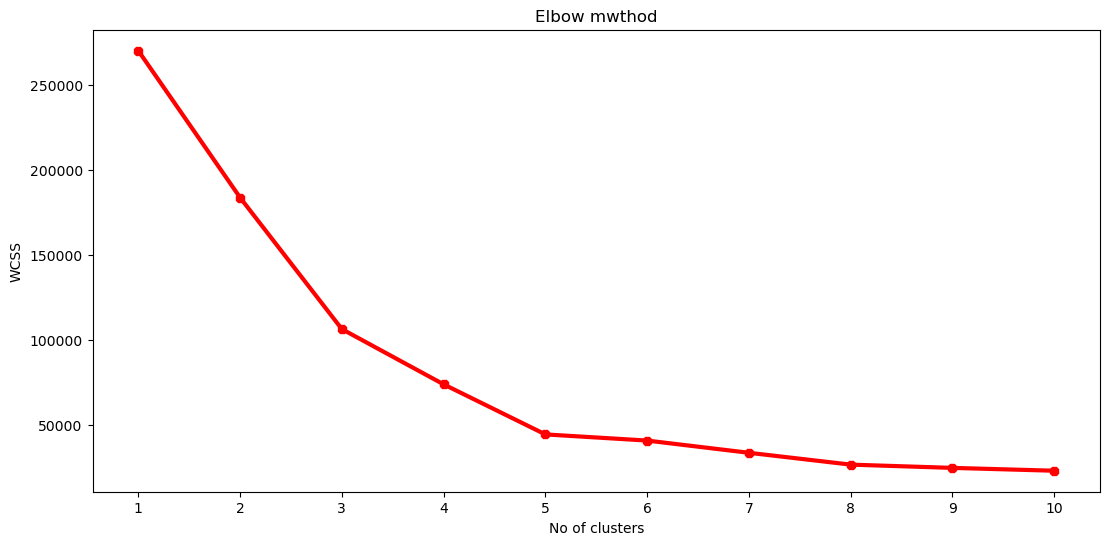

In [15]:
#plot results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,11),errors)
plt.plot(range(1,11),errors,linewidth=3,color='red',marker='8')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.title('Elbow mwthod')
plt.xticks(np.arange(1,11,1))
plt.show()

In [17]:
#label
km=KMeans(n_clusters=5)
km.fit(dataset1)
y=km.predict(dataset1) 
dataset1['Label']=y
dataset1.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

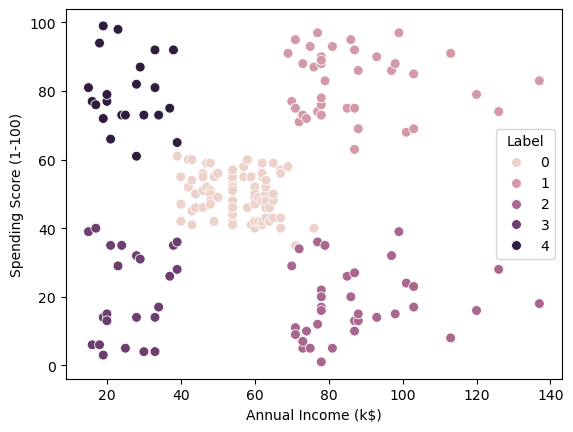

In [18]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=dataset1,hue='Label',s=50)

In [19]:
#3D clusters
dataset2=dataset[['Annual Income (k$)','Spending Score (1-100)','Age']]
dataset2.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


In [20]:
errors=[]
X2=dataset2[['Annual Income (k$)','Spending Score (1-100)']]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X2)
    errors.append(kmeans.inertia_)

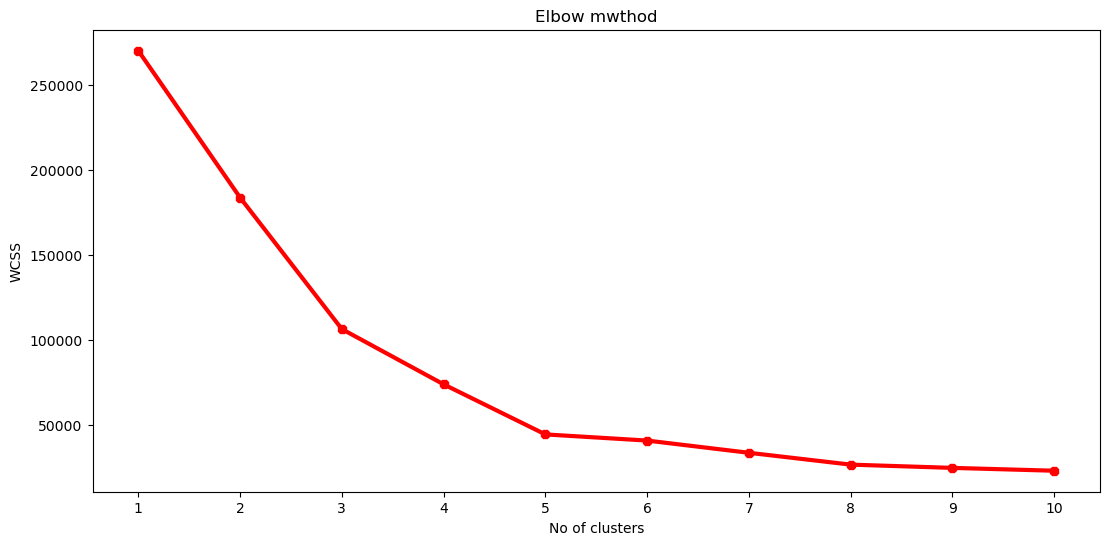

In [21]:
#plot results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,11),errors)
plt.plot(range(1,11),errors,linewidth=3,color='red',marker='8')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.title('Elbow mwthod')
plt.xticks(np.arange(1,11,1))
plt.show()

In [22]:
km=KMeans(n_clusters=5)
km.fit(dataset2)
y=km.predict(dataset2) 
dataset2['Label']=y
dataset2.head()

,Annual Income (k$),Spending Score (1-100),Age,Label
0,15,39,19,1
1,15,81,21,1
2,16,6,20,0
3,16,77,23,1
4,17,40,31,0


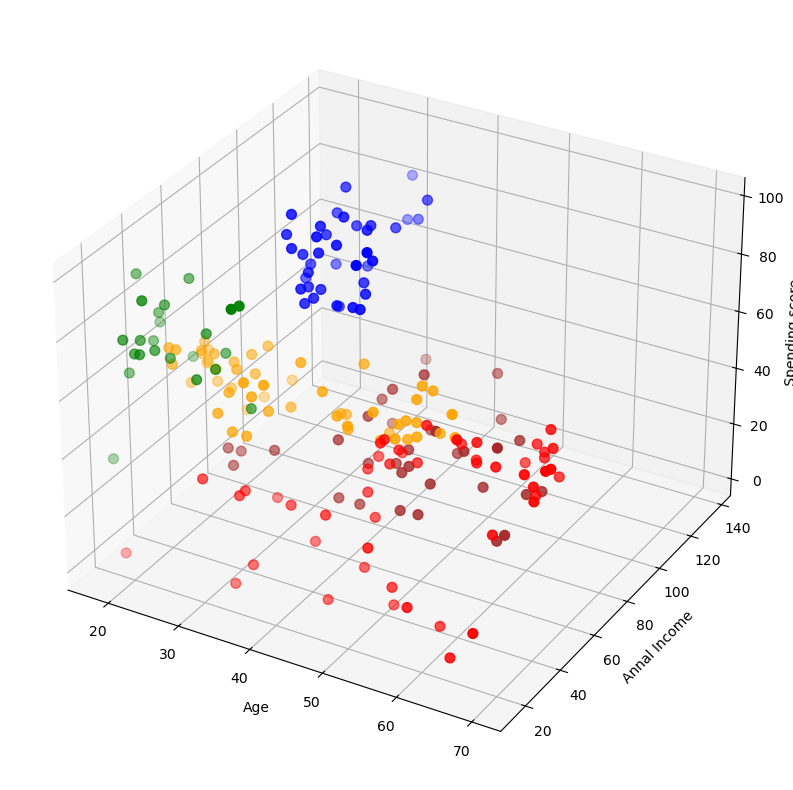

In [23]:
#3D scatterplot
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(dataset2['Age'][dataset2['Label']==0],dataset2['Annual Income (k$)'][dataset2['Label']==0],dataset2['Spending Score (1-100)'][dataset2['Label']==0],c='red',s=50)
ax.scatter(dataset2['Age'][dataset2['Label']==1],dataset2['Annual Income (k$)'][dataset2['Label']==1],dataset2['Spending Score (1-100)'][dataset2['Label']==1],c='green',s=50)
ax.scatter(dataset2['Age'][dataset2['Label']==2],dataset2['Annual Income (k$)'][dataset2['Label']==2],dataset2['Spending Score (1-100)'][dataset2['Label']==2],c='blue',s=50)
ax.scatter(dataset2['Age'][dataset2['Label']==3],dataset2['Annual Income (k$)'][dataset2['Label']==3],dataset2['Spending Score (1-100)'][dataset2['Label']==3],c='brown',s=50)
ax.scatter(dataset2['Age'][dataset2['Label']==4],dataset2['Annual Income (k$)'][dataset2['Label']==4],dataset2['Spending Score (1-100)'][dataset2['Label']==4],c='orange',s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Annal Income')
ax.set_zlabel('Spending score')
plt.show()
